In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydicom

In [4]:
best_images_paths=pd.read_csv('../input/rsna-best-images-paths/best_images_paths.csv')
best_images_paths.head()

,files_num,best_flair_images,best_t1w_images,best_t1wce_images,best_t2w_images
0,532,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...
1,356,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...
2,491,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...
3,214,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...
4,481,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...


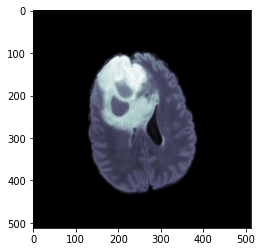

In [5]:
ds = pydicom.dcmread(best_images_paths['best_flair_images'][0])
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

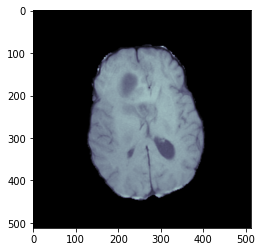

In [6]:
ds = pydicom.dcmread(best_images_paths['best_t1w_images'][0])
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

In [8]:
train_labels=pd.read_csv('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv')
train_labels.head()

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1


In [9]:
ds=pd.merge(train_labels,best_images_paths,left_on=['BraTS21ID'],right_on=['files_num'])

In [10]:
ds.head()

,BraTS21ID,MGMT_value,files_num,best_flair_images,best_t1w_images,best_t1wce_images,best_t2w_images
0,0,1,0,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...
1,2,1,2,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...
2,3,0,3,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...
3,5,1,5,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...
4,6,1,6,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...


In [11]:
ds.shape

(585, 7)

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 584
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BraTS21ID          585 non-null    int64 
 1   MGMT_value         585 non-null    int64 
 2   files_num          585 non-null    int64 
 3   best_flair_images  583 non-null    object
 4   best_t1w_images    584 non-null    object
 5   best_t1wce_images  585 non-null    object
 6   best_t2w_images    584 non-null    object
dtypes: int64(3), object(4)
memory usage: 36.6+ KB


In [13]:
ds=ds.dropna(axis=0)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 584
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BraTS21ID          582 non-null    int64 
 1   MGMT_value         582 non-null    int64 
 2   files_num          582 non-null    int64 
 3   best_flair_images  582 non-null    object
 4   best_t1w_images    582 non-null    object
 5   best_t1wce_images  582 non-null    object
 6   best_t2w_images    582 non-null    object
dtypes: int64(3), object(4)
memory usage: 36.4+ KB


In [14]:
ds.to_csv('merge_labels_and_paths.csv',index=False)